<a href="https://colab.research.google.com/github/me-sajal/Emotion-Analysis/blob/main/EmotionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dataset link "https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp?datasetId=605165&sortBy=voteCount"

In [1]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp?datasetId=605165&sortBy=voteCount")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sajalrokka
Your Kaggle Key: ··········


100%|██████████| 721k/721k [00:00<00:00, 114MB/s]

- This line of code is using the `pip` package manager to install the Python package called `opendatasets`. It's a common practice to install external packages using `pip` to make them available for your Python projects.
- This line imports the `opendatasets` package and aliases it as `od`. Importing packages allows you to access their functions and classes in your Python code.
- This line of code uses the `download` function from the `opendatasets` package to download a dataset from a specified URL. In this case, it's downloading a dataset from Kaggle with the URL provided. Kaggle is a popular platform for data science and machine learning datasets.
- The dataset being downloaded appears to be related to emotions and NLP (Natural Language Processing), and it has a specific dataset ID (605165) on Kaggle. It may be used for various data analysis and machine learning tasks related to emotions and text data.

In summary, the code is installing the `opendatasets` package and then using it to download a specific dataset from Kaggle, which can be useful for data-related projects and analysis.

In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stop_words = nltk.corpus.stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


1. **Import Libraries:**
   - `import numpy as np`: Imports the NumPy library, which is used for numerical operations and array handling.
   - `import pandas as pd`: Imports the Pandas library, which is used for data manipulation and analysis.
   - `from sklearn.feature_extraction.text import TfidfVectorizer`: Imports the TF-IDF Vectorizer from scikit-learn, a tool for text feature extraction.
   - `from sklearn.naive_bayes import MultinomialNB`: Imports the Multinomial Naive Bayes classifier from scikit-learn.
   - `from sklearn.linear_model import LogisticRegression`: Imports the Logistic Regression classifier from scikit-learn.
   - `from sklearn.svm import SVC`: Imports the Support Vector Classifier (SVC) from scikit-learn.
   - `from sklearn.metrics import accuracy_score, confusion_matrix, classification_report`: Imports various evaluation metrics for machine learning models.
   - `import matplotlib.pyplot as plt`: Imports the Matplotlib library for data visualization.
   - `import seaborn as sns`: Imports the Seaborn library, which enhances Matplotlib visualizations.
   - `import nltk`: Imports the Natural Language Toolkit (NLTK) library for natural language processing tasks.
   - `nltk.download('stopwords')`: Downloads NLTK's stopwords data, which are common words (e.g., "the," "and") often removed from text during text analysis.
   - `nltk.download('punkt')`: Downloads NLTK's Punkt tokenizer models for text tokenization.

2. **Define Stopwords:**
   - `stop_words = nltk.corpus.stopwords.words('english')`: Creates a list of English stopwords using NLTK's built-in stopwords corpus. These stopwords are typically removed from text data during text preprocessing to focus on meaningful words.

The code appears to set up the necessary libraries and resources for text-based machine learning tasks. It prepares for tasks like text classification using various classifiers (Multinomial Naive Bayes, Logistic Regression, and Support Vector Classifier) and includes tools for data visualization and performance evaluation. Additionally, it downloads NLTK resources for text preprocessing.

In [3]:
# Read the training data from file
train_df = pd.read_csv("/content/emotions-dataset-for-nlp/train.txt", header=None, sep=";", names=["Comment", "Emotion"], encoding="utf-8")

# Read the test data from file
test_df = pd.read_csv("/content/emotions-dataset-for-nlp/test.txt", header=None, sep=";", names=["Comment", "Emotion"], encoding="utf-8")

# Read the validation data from file
val_df = pd.read_csv("/content/emotions-dataset-for-nlp/val.txt", header=None, sep=";", names=["Comment", "Emotion"], encoding="utf-8")


These code snippets read training, test, and validation data from separate text files into Pandas DataFrames, where each row consists of a comment and its associated emotion label. Here are some short notes about what each part of the code does:

1. **Reading Training Data**:
   - Reads the training data from a text file located at "/content/emotions-dataset-for-nlp/train.txt."
   - The data is read with no header row (header=None) and semicolon (;) as the delimiter (sep=";").
   - It assigns column names "Comment" and "Emotion" to the DataFrame.
   - The "utf-8" encoding is specified to ensure proper handling of text.

2. **Reading Test Data**:
   - Reads the test data from a text file located at "/content/emotions-dataset-for-nlp/test.txt."
   - Similar to the training data, it uses no header, semicolon delimiter, and assigns column names.

3. **Reading Validation Data**:
   - Reads the validation data from a text file located at "/content/emotions-dataset-for-nlp/val.txt."
   - Follows the same conventions as the training and test data for reading and formatting.

These code snippets are typically part of a data preprocessing pipeline in a machine learning or natural language processing project. Once executed, you'll have three Pandas DataFrames (`train_df`, `test_df`, and `val_df`) that contain your data, making it easier to perform further data analysis, preprocessing, and model training/validation/testing.

In [4]:

# Combine the training and validation data
train_val_df = pd.concat([train_df, val_df], ignore_index=True)
train_val_df



,Comment,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
17995,im having ssa examination tomorrow in the morn...,sadness
17996,i constantly worry about their fight against n...,joy
17997,i feel its important to share this info for th...,joy
17998,i truly feel that if you are passionate enough...,joy


The code provided combines the training and validation data into a single DataFrame named `train_val_df`. Here are some short notes explaining this process:

- **Purpose**: The purpose of this code is to create a combined dataset that includes both the training and validation data. This can be useful in various machine learning tasks, such as data preprocessing and model training.

- **DataFrames**: The code assumes that there are two DataFrames named `train_df` and `val_df`, which presumably contain training and validation data, respectively.

- **`pd.concat`**: This function is part of the Pandas library and is used to concatenate (combine) DataFrames along a specified axis. In this case, `pd.concat` is used to concatenate `train_df` and `val_df` vertically, stacking them on top of each other.

- **`ignore_index=True`**: By setting `ignore_index` to `True`, the resulting combined DataFrame, `train_val_df`, will have a new index that ignores the original indices of `train_df` and `val_df`. This is useful to ensure a continuous index for the combined data.

- **Result**: The result of running this code is the `train_val_df` DataFrame, which contains both the training and validation data. This combined dataset can then be used for further data manipulation, preprocessing, or model training as needed.

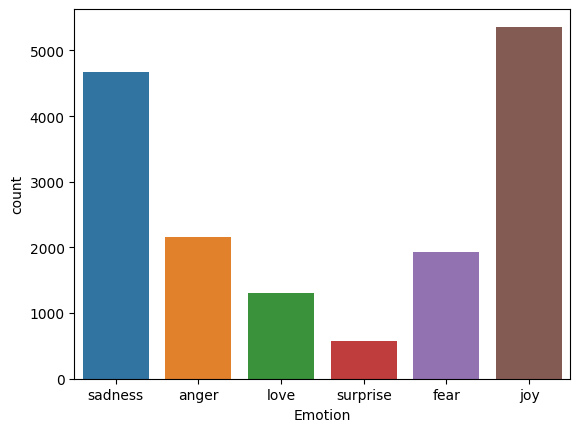

In [5]:
sns.countplot(data = train_df, x = 'Emotion')
# Split the data into features and labels
train_x = train_val_df["Comment"]
train_y = train_val_df["Emotion"]
test_x = test_df["Comment"]
test_y = test_df["Emotion"]
val_x = val_df["Comment"]
val_y = val_df["Emotion"]

1. `sns.countplot(data=train_df, x='Emotion')`:
   - This code uses the `seaborn` library to create a countplot.
   - It visualizes the distribution of different emotions (or categories) in the `train_df` DataFrame using the 'Emotion' column as the x-axis.
   - A countplot is a bar chart that displays the frequency of each category in a categorical variable.

2. Splitting the data into features and labels:
   - The code is splitting a dataset into features (input) and labels (output).
   - `train_x` and `train_y` represent the training features (comments) and labels (emotions) respectively.
   - `test_x` and `test_y` represent the testing features and labels, while `val_x` and `val_y` represent the validation features and labels.
   - This separation is essential for supervised machine learning, where the model learns to map input features to output labels during training.

In summary, the first code snippet creates a countplot to visualize the distribution of emotions in the training dataset. The second part of the code splits the dataset into training, testing, and validation sets, separating the features (comments) from the labels (emotions) to prepare the data for machine learning tasks like classification.

In [6]:
labels = ['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']


**Labels: ['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']**

1. **Sadness:** This label represents a state of emotional distress or unhappiness. It is often associated with feelings of sorrow, grief, or melancholy.

2. **Anger:** This label signifies a strong feeling of displeasure, irritation, or hostility. Anger is characterized by a desire to express frustration or resentment.

3. **Love:** Love is a profound and positive emotion characterized by affection, attachment, and caring for someone or something. It often involves strong feelings of warmth and fondness.

4. **Surprise:** Surprise represents a sudden and unexpected reaction to something. It can be a mix of emotions, including astonishment, amazement, or shock.

5. **Fear:** Fear is a powerful and often negative emotion triggered by the anticipation of danger, threat, or harm. It can lead to feelings of anxiety, apprehension, or panic.

6. **Joy:** Joy is a positive and uplifting emotion associated with happiness, delight, and pleasure. It often leads to feelings of contentment, elation, or euphoria.

These labels are commonly used in various contexts, including sentiment analysis, emotion recognition, and categorizing human emotions in texts, images, or other forms of data. Understanding and classifying these emotions can be valuable for applications such as customer sentiment analysis, mental health monitoring, and user experience evaluation.

In [7]:
# Split the data into features and labels
train_x = train_val_df["Comment"]
train_y = train_val_df["Emotion"]
test_x = test_df["Comment"]
test_y = test_df["Emotion"]

train_y.unique()


array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

1. **Data Splitting**: In this code snippet, a dataset is being prepared for a machine learning or natural language processing task. The data is divided into two parts: a training set (`train_x` and `train_y`) and a test set (`test_x` and `test_y`).

2. **Features and Labels**: The features (`train_x` and `test_x`) typically contain the input data, which in this case appears to be comments or text data. The labels (`train_y` and `test_y`) contain the corresponding target values, which seem to represent emotions in this context.

3. **Unique Labels**: The `unique()` method is used to obtain the unique emotion labels present in the training data. This is helpful for understanding the distribution of emotions in the dataset and can be useful for tasks like classification, where you need to identify different classes or categories.

Overall, this code is an essential step in preparing a dataset for a machine learning task, as it separates the data into features and labels, which are crucial for training and evaluating models. Additionally, identifying unique labels provides insight into the diversity of emotions in the training data.

In [8]:
exclude_list = ['not']
filtered_stopwords = [word for word in stop_words if word not in exclude_list]

1. **Purpose**: The code is intended to filter out specific words from a list of stop words.

2. **Stopwords**: Stopwords are common words (e.g., "the," "and," "is") that are often removed from text data during natural language processing (NLP) tasks because they are considered to carry little semantic meaning.

3. **`exclude_list`**: `exclude_list` is a Python list containing words that you want to exclude or remove from the list of stop words.

4. **List Comprehension**: The code uses a list comprehension, denoted by `[...]`, to create a new list (`filtered_stopwords`) by iterating through each word in the `stop_words` list.

5. **Condition**: For each word in the `stop_words` list, the code checks if it is not in the `exclude_list`. If the word is not in the `exclude_list`, it is included in the `filtered_stopwords` list.

6. **Result**: After the code executes, `filtered_stopwords` will contain all the stop words from the original `stop_words` list except for the words listed in the `exclude_list`. This can be useful for customizing stop word lists for specific NLP tasks where certain words should be retained even if they are traditionally considered stop words.

Overall, this code snippet demonstrates a way to filter stop words based on a specific exclusion list, allowing you to tailor your stop word list to the requirements of your NLP project.

In [9]:
vectorizer = TfidfVectorizer(stop_words = filtered_stopwords)
train_x_vec = vectorizer.fit_transform(train_x)
test_x_vec = vectorizer.transform(test_x)
val_x_vec = vectorizer.transform(val_x)
train_x_vec

<18000x16030 sparse matrix of type '<class 'numpy.float64'>'
	with 164500 stored elements in Compressed Sparse Row format>

1. **Vectorizer Initialization**:
   - `vectorizer = TfidfVectorizer(stop_words=filtered_stopwords)`: This line initializes a TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer. It's used to convert text data into numerical vectors while considering stop words (common words like "the," "and," "in") specified in `filtered_stopwords` to be excluded.

2. **Training Data Transformation**:
   - `train_x_vec = vectorizer.fit_transform(train_x)`: Here, the `fit_transform` method is applied to the training data (`train_x`). It fits the vectorizer on the training data and transforms it into a TF-IDF matrix. Each row in this matrix represents a document from the training data, and each column corresponds to a unique word or term in the entire training corpus.

3. **Test Data Transformation**:
   - `test_x_vec = vectorizer.transform(test_x)`: This line uses the previously fitted vectorizer to transform the test data (`test_x`) into a TF-IDF matrix. It ensures that the same vectorization scheme applied to the training data is used for the test data.

4. **Validation Data Transformation**:
   - `val_x_vec = vectorizer.transform(val_x)`: Similar to the test data transformation, this line transforms the validation data (`val_x`) into a TF-IDF matrix using the same vectorizer settings.

5. **Result**:
   - `train_x_vec`: This variable now holds the TF-IDF representation of the training data after transformation. It can be used as input for training machine learning models.

In summary, the code is preparing text data for machine learning by converting it into numerical vectors using TF-IDF vectorization. It fits the vectorizer on the training data and then transforms both the test and validation data using the same vectorization scheme. This process is common when working with text data for tasks like text classification or sentiment analysis.

### MultinomialNB

In [10]:
# Train the model
nb_model = MultinomialNB()
nb_model.fit(train_x_vec, train_y)


MultinomialNB()

- `nb_model`: This is a variable representing a Multinomial Naive Bayes (NB) classifier. Multinomial Naive Bayes is a type of probabilistic classifier commonly used for text classification tasks.

- `MultinomialNB()`: This line initializes a Multinomial Naive Bayes classifier. The `MultinomialNB` class is typically part of a machine learning library like Scikit-Learn.

- `fit(train_x_vec, train_y)`: This method is used to train the Multinomial Naive Bayes classifier. It takes two arguments:
   - `train_x_vec`: This is the training data, which is often a collection of text documents that have been vectorized or transformed into numerical features. In the context of text classification, this is typically a matrix where rows represent documents, and columns represent features.
   - `train_y`: These are the corresponding labels for the training data. In text classification, these labels represent the categories or classes to which each document belongs.

The `fit` method essentially teaches the Multinomial Naive Bayes classifier how to classify text documents into different categories or classes based on the patterns it observes in the training data. Once trained, the classifier can be used to make predictions on new, unseen text data.

Overall, this code snippet is a fundamental step in training a text classification model using Multinomial Naive Bayes, a popular choice for tasks such as spam detection and sentiment analysis.

In [11]:
# Evaluate the model on the test data
test_y_pred = nb_model.predict(test_x_vec)
test_accuracy = accuracy_score(test_y, test_y_pred)
test_confusion_matrix = confusion_matrix(test_y, test_y_pred)
test_classification_report = classification_report(test_y, test_y_pred, zero_division=1)

1. **Evaluate the Model on Test Data**:
   - In machine learning, it's essential to assess how well a trained model performs on unseen data.
   - The code begins by using the trained `nb_model` to make predictions on the test data (`test_x_vec`).
   
2. **Calculate Test Accuracy**:
   - Accuracy is a common metric used to measure the overall correctness of predictions.
   - The `accuracy_score` function is used to compare the predicted labels (`test_y_pred`) to the true labels (`test_y`) and calculate the accuracy.
   - The accuracy score represents the proportion of correctly predicted labels in the test data.

3. **Generate Test Confusion Matrix**:
   - A confusion matrix is a table used to evaluate the performance of a classification model.
   - The `confusion_matrix` function calculates the number of true positives, true negatives, false positives, and false negatives based on the predicted and true labels.
   - It provides insights into the model's performance for each class and helps identify potential areas of improvement.

4. **Compute Test Classification Report**:
   - The classification report is a summary of various classification metrics for each class in a multi-class problem.
   - It includes metrics like precision, recall, F1-score, and support.
   - The `classification_report` function calculates these metrics for each class based on the predicted labels (`test_y_pred`) and the true labels (`test_y`).
   - The `zero_division` parameter is set to 1 to prevent division by zero errors when a class has no true instances (avoids a runtime error).

Overall, these steps are part of the model evaluation process. They allow you to assess the performance of your machine learning model on a separate test dataset, providing insights into its accuracy and how well it performs for different classes in a classification problem.

In [12]:
print(f"Test Accuracy: {test_accuracy}")
print("\n")
print(f"Test Classification Report:\n{test_classification_report}")

Test Accuracy: 0.691


Test Classification Report:
              precision    recall  f1-score   support

       anger       0.95      0.33      0.49       275
        fear       0.93      0.29      0.44       224
         joy       0.65      0.99      0.78       695
        love       1.00      0.05      0.10       159
     sadness       0.69      0.91      0.79       581
    surprise       1.00      0.00      0.00        66

    accuracy                           0.69      2000
   macro avg       0.87      0.43      0.43      2000
weighted avg       0.77      0.69      0.63      2000



1. `print(f"Test Accuracy: {test_accuracy}")`: This line of code is using Python's f-string formatting to display the test accuracy of a machine learning model. The variable `test_accuracy` should contain the accuracy value, and it's displayed in a user-friendly format along with a descriptive label, "Test Accuracy."

2. `print("\n")`: This line simply prints a newline character, creating a blank line in the console or output. It's often used to separate different sections or improve the readability of the output.

3. `print(f"Test Classification Report:\n{test_classification_report}")`: This line uses f-string formatting to display the test classification report generated by a machine learning model. The variable `test_classification_report` should contain the classification report, which typically includes metrics such as precision, recall, F1-score, and support for each class in a classification task. The "\n" is used to add a newline character to format the output nicely, making it easier to read.

In summary, these lines of code are used to report and display key evaluation metrics, specifically the test accuracy and test classification report, in a clear and organized manner for machine learning model assessment.

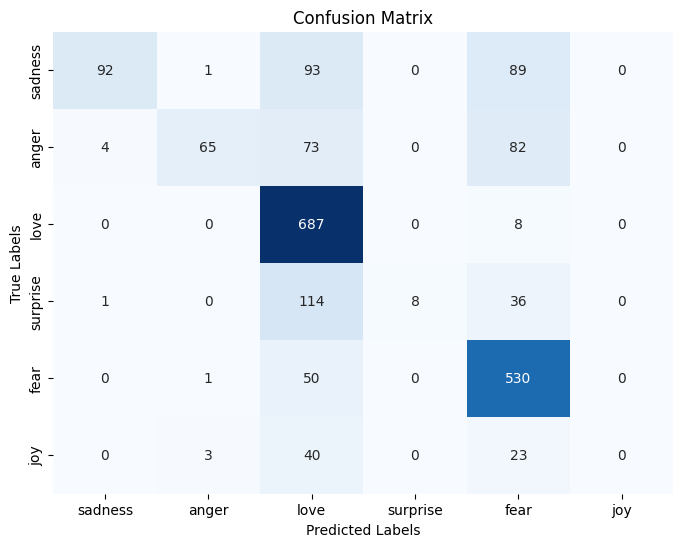

In [13]:
# Create a heatmap of the confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(test_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

1. **Import Required Libraries**: Before creating the heatmap, you need to import the necessary Python libraries, such as Matplotlib and Seaborn. Typically, you'll import them like this:

```python
import matplotlib.pyplot as plt
import seaborn as sns
```

2. **Set Figure Size**: You can specify the size of the figure where the heatmap will be displayed using `plt.figure(figsize=(width, height))`. This step helps control the dimensions of the heatmap.

```python
plt.figure(figsize=(8, 6))
```

3. **Create the Heatmap**: To create the heatmap, use the `sns.heatmap()` function. Pass the confusion matrix as the data, set `annot=True` to display the values in each cell, and format the values using `fmt="d"` for integers. You can also specify the colormap (`cmap`) to control the color scheme of the heatmap. In this case, it's set to "Blues." To remove the color bar, you can set `cbar=False`.

```python
sns.heatmap(test_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
```

4. **Add Titles and Labels**: Enhance the readability of your heatmap by adding a title, labeling the x-axis and y-axis. This step helps viewers understand what the heatmap represents.

```python
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
```

5. **Display the Heatmap**: Finally, use `plt.show()` to display the heatmap on your screen or in your Jupyter Notebook. This step is crucial to visualize the confusion matrix.

```python
plt.show()
```

By following these steps, you can create a visually informative heatmap of a confusion matrix in Python, making it easier to analyze the performance of a classification model.

### Logistic regression

In [14]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(train_x_vec, train_y)


LogisticRegression(max_iter=1000)

## Logistic Regression

- Logistic Regression is a widely used statistical and machine learning technique for binary classification problems (two classes).
- It's an algorithm used for predicting the probability of a binary outcome (1 / 0, Yes / No, True / False) based on one or more predictor variables.
- In the given code snippet, a Logistic Regression model is being used for classification.
- `max_iter` is a hyperparameter that specifies the maximum number of iterations for the solver to converge. It's set to 1000 in this example to ensure convergence.
- The `fit` method is used to train the Logistic Regression model on the provided training data (`train_x_vec` and `train_y`).
- Once trained, the model can be used to make predictions on new data, making it suitable for various classification tasks.

In summary, the code snippet first creates a heatmap to visualize the confusion matrix, which is a useful tool for evaluating classification model performance. Then, it utilizes a Logistic Regression model with a specified maximum number of iterations for training on training data.

In [15]:
# Evaluate the model on the test data
test_y_pred = lr_model.predict(test_x_vec)
test_accuracy = accuracy_score(test_y, test_y_pred)
test_confusion_matrix = confusion_matrix(test_y, test_y_pred)
test_classification_report = classification_report(test_y, test_y_pred, zero_division=1)

1. Evaluate the model on the test data:
   - Purpose: This code snippet is used to assess the performance of a machine learning model on a separate test dataset.
   - Explanation:
     - `test_y_pred`: This variable stores the model's predictions on the test dataset.
     - `test_accuracy`: It calculates the accuracy of the model's predictions by comparing them to the true labels in `test_y`. Accuracy measures the proportion of correct predictions.
     - `test_confusion_matrix`: This variable computes the confusion matrix for the test dataset, which is used to analyze the model's performance in more detail.
     - `test_classification_report`: It generates a classification report that includes various metrics such as precision, recall, F1-score, and support for each class. The `zero_division` parameter is set to 1, which avoids division by zero errors in cases where there are no true positives for a class.
   - Implementation: This code should be executed after the model has been trained and tested using a separate test dataset. It provides a comprehensive assessment of the model's performance on unseen data, beyond just accuracy.

In [16]:
print(f"Test Accuracy: {test_accuracy}")
print("\n")
print(f"Test Classification Report:\n{test_classification_report}")

Test Accuracy: 0.871


Test Classification Report:
              precision    recall  f1-score   support

       anger       0.88      0.85      0.86       275
        fear       0.89      0.80      0.84       224
         joy       0.85      0.96      0.90       695
        love       0.80      0.62      0.70       159
     sadness       0.91      0.92      0.91       581
    surprise       0.86      0.48      0.62        66

    accuracy                           0.87      2000
   macro avg       0.86      0.77      0.81      2000
weighted avg       0.87      0.87      0.87      2000



1. **Test Accuracy Display**: The first line of code prints the test accuracy of a machine learning model. This is a metric that measures the model's performance on a test dataset, often used in classification tasks. The `test_accuracy` variable holds the accuracy value.

2. **Blank Line**: The second line simply prints an empty line. This is often used for better readability in the console output to visually separate different sections of information.

3. **Test Classification Report Display**: The third line of code prints the test classification report. A classification report provides detailed information about the model's performance in terms of precision, recall, F1-score, and support for each class in a classification task. It helps evaluate how well the model can classify different classes. The `test_classification_report` variable holds the classification report.

These lines of code are typically used in machine learning and data analysis tasks to report and analyze the performance of a trained model on a test dataset. They provide valuable insights into how well the model is doing in terms of accuracy and class-specific metrics.

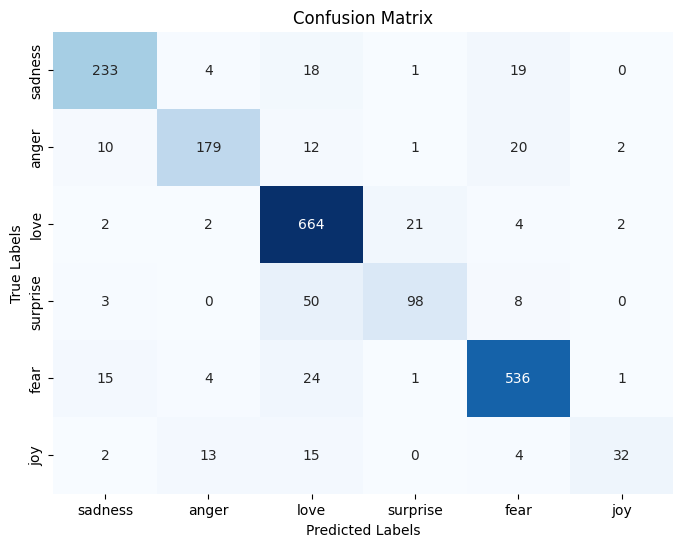

In [17]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(test_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

- In this code snippet, we create a heatmap to visualize a confusion matrix, which is often used in the evaluation of classification models.
- We use the `matplotlib.pyplot` and `seaborn` libraries for creating and customizing the heatmap.
- The `plt.figure(figsize=(8, 6))` line sets the size of the heatmap figure to make it more visually appealing.
- `sns.heatmap` is used to create the heatmap, and we pass various parameters to customize its appearance and content.
- `test_confusion_matrix` represents the actual confusion matrix data that you want to visualize.
- `annot=True` displays the values inside each cell of the heatmap.
- `fmt="d"` specifies that the values should be formatted as integers.
- `cmap="Blues"` sets the color map for the heatmap to different shades of blue.
- `cbar=False` hides the color bar on the side of the heatmap.
- `xticklabels` and `yticklabels` allow you to specify labels for the x-axis (predicted labels) and y-axis (true labels).
- Finally, we set the title and labels for the heatmap and display it using `plt.show()`.

This code is useful for visualizing the performance of a classification model by displaying the true positive, true negative, false positive, and false negative counts in a clear and interpretable manner.

### SVM (Support Vector Machines)

In [18]:
svm_model = SVC(kernel='linear')  # You can try different kernels
svm_model.fit(train_x_vec, train_y)

SVC(kernel='linear')

- `svm_model`: This variable is being used to create an instance of a Support Vector Machine (SVM) classifier.

- `SVC(kernel='linear')`: Here, we're initializing an SVM classifier with a linear kernel. SVM is a supervised machine learning algorithm used for classification tasks, and the choice of the kernel determines the decision boundary shape. The linear kernel draws a linear decision boundary.

- `svm_model.fit(train_x_vec, train_y)`: This line of code trains the SVM model on the training data. `train_x_vec` represents the training features, and `train_y` represents the corresponding target labels. The `fit` method is used to find the optimal decision boundary that separates different classes in the training data.

In summary, this code snippet creates an SVM classifier with a linear kernel and trains it on the provided training data. The trained model can then be used to make predictions on new data points or evaluate its performance on test data. Additionally, you can experiment with different kernels (e.g., 'rbf', 'poly') to see how they affect the SVM's decision boundary.

In [19]:
# Evaluate the model on the test data
test_y_pred = svm_model.predict(test_x_vec)
test_accuracy = accuracy_score(test_y, test_y_pred)
test_confusion_matrix = confusion_matrix(test_y, test_y_pred)
test_classification_report = classification_report(test_y, test_y_pred, zero_division=1)

1. `test_y_pred = svm_model.predict(test_x_vec)`: This line is using the trained SVM model (`svm_model`) to make predictions (`test_y_pred`) on the test data (`test_x_vec`).

2. `test_accuracy = accuracy_score(test_y, test_y_pred)`: This line calculates the accuracy of the model's predictions by comparing them to the true labels (`test_y`). The `accuracy_score` function computes the fraction of correctly predicted instances.

3. `test_confusion_matrix = confusion_matrix(test_y, test_y_pred)`: This line computes a confusion matrix (`test_confusion_matrix`) to provide a breakdown of the model's predictions, showing the number of true positives, true negatives, false positives, and false negatives for each class.

4. `test_classification_report = classification_report(test_y, test_y_pred, zero_division=1)`: This line generates a classification report (`test_classification_report`) that includes various metrics such as precision, recall, F1-score, and support for each class. The `zero_division=1` parameter is used to handle cases where there are zero true positives, true negatives, or false positives for a class, avoiding division by zero errors.

These evaluation metrics help you assess the performance of your SVM model on the test data and provide insights into how well it is classifying the data into different categories or classes.

In [20]:
print(f"Test Accuracy: {test_accuracy}")
print("\n")
print(f"Test Classification Report:\n{test_classification_report}")

Test Accuracy: 0.886


Test Classification Report:
              precision    recall  f1-score   support

       anger       0.87      0.88      0.88       275
        fear       0.86      0.85      0.86       224
         joy       0.89      0.94      0.92       695
        love       0.79      0.73      0.76       159
     sadness       0.93      0.91      0.92       581
    surprise       0.74      0.61      0.67        66

    accuracy                           0.89      2000
   macro avg       0.85      0.82      0.83      2000
weighted avg       0.88      0.89      0.88      2000




```python
print(f"Test Accuracy: {test_accuracy}")
```

- This line of code is used to print the test accuracy of a machine learning model.
- It uses an f-string to format the output, where `{test_accuracy}` will be replaced with the actual test accuracy value.
- Test accuracy is a measure of how well the model performs on a separate test dataset, typically used for evaluating model performance.

```python
print("\n")
```

- This line of code prints a newline character, which adds a blank line in the console output.
- It's often used to separate different sections or elements in the console output for better readability.

```python
print(f"Test Classification Report:\n{test_classification_report}")
```

- This line of code is used to print a test classification report.
- It uses an f-string to format the output, where `{test_classification_report}` will be replaced with the actual classification report.
- A classification report provides various metrics (such as precision, recall, F1-score, and support) for each class in a classification problem.
- It's a useful tool for assessing the performance of a classification model, especially in multi-class problems.

In summary, the provided code snippet is responsible for displaying the test accuracy and a test classification report, including various performance metrics for a machine learning model. The use of f-strings allows for dynamic formatting of these values in the output.

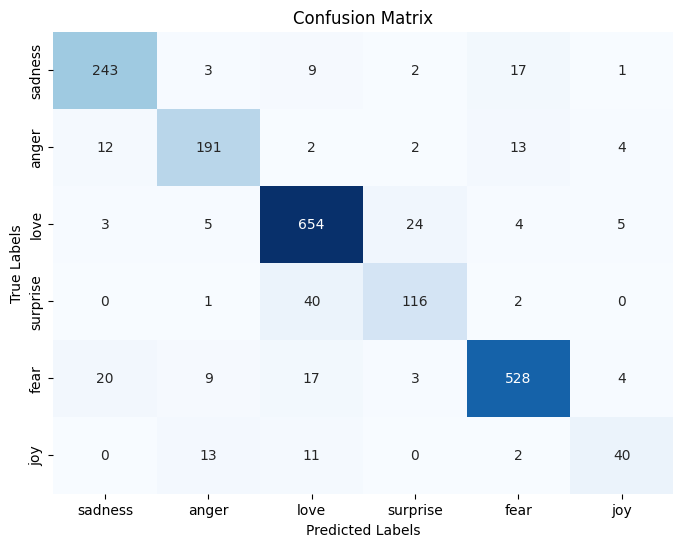

In [21]:
# Create a heatmap of the confusion matrix

labels = ['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']
plt.figure(figsize=(8, 6))
sns.heatmap(test_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

1. This code is used to create a heatmap visualization of a confusion matrix, which is a common tool in machine learning for evaluating the performance of a classification model.

2. The `labels` list contains the class labels or categories for which the confusion matrix is generated. These labels are used for the axis ticks on the heatmap.

3. Matplotlib and Seaborn libraries are imported to create and style the heatmap.

4. `plt.figure(figsize=(8, 6))` sets the size of the figure to control the dimensions of the heatmap.

5. `sns.heatmap` is used to create the heatmap. Parameters like `annot=True` add annotations (numbers) to the cells, `fmt="d"` formats the annotations as integers, `cmap="Blues"` sets the color map to shades of blue, `cbar=False` removes the color bar, and `xticklabels` and `yticklabels` are used to set the labels for the axes.

6. Finally, the code adds a title to the heatmap, labels the x and y axes, and displays the heatmap using `plt.show()`.

This code is useful for visualizing the performance of a classification model by showing how well it predicts different classes and where it tends to make errors.

In [22]:
new_text = [
    "I feel excited about the upcoming event.",
    "The news made me feel anxious and worried.",
    "This song always brings tears to my eyes.",
    "I can't stop laughing at this funny video.",
    "The unexpected surprise filled me with joy.",
    "His rude behavior made me angry.",
    "She looked so beautiful, and I couldn't help but fall in love.",
    "The horror movie scared me to death.",
    "The thrilling rollercoaster ride made my heart race with excitement.",
    "The loss of my pet left me feeling devastated and sad.",
]

This code defines a list called "new_text" containing 10 different sentences, each describing various emotional reactions or feelings in response to different situations or stimuli. These sentences express emotions such as excitement, anxiety, joy, anger, love, fear, and sadness.

In [23]:

# Vectorize the new text data
new_text_vectorized = vectorizer.transform(new_text)


This code is transforming new text data into a numerical format using a vectorizer. The variable "new_text_vectorized" will hold the numerical representation of the new text data after this transformation, making it suitable for various machine learning algorithms or analysis tasks.

In [24]:
# Choose a random model
models = [svm_model, lr_model, nb_model]
def choose_best_model(models, X_test, y_test):
    best_model = None
    best_accuracy = 0.0

    for model in models:
        accuracy = model.score(X_test, y_test)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model

    return best_model

best_model = choose_best_model(models, test_x_vec, test_y)
print(f"Best model: {best_model}\n Accuracy: {best_model.score(test_x_vec, test_y)}")
# Make predictions using the trained model


Best model: SVC(kernel='linear')
 Accuracy: 0.886


This code is designed to choose the best machine learning model from a list of models based on its accuracy on a test dataset and then use the selected best model to make predictions.

1. `models` is a list containing different machine learning models, such as `svm_model`, `lr_model`, and `nb_model`.

2. The `choose_best_model` function takes three arguments:
   - `models`: The list of machine learning models to choose from.
   - `X_test`: The test data features.
   - `y_test`: The corresponding test data labels.

3. Inside the `choose_best_model` function, it iterates through each model in the `models` list and calculates the accuracy of the model on the provided test data (`X_test` and `y_test`) using the `score` method. It keeps track of the best model with the highest accuracy encountered so far.

4. After iterating through all models, the function returns the best model with the highest accuracy.

5. Outside the function, the code calls `choose_best_model` with the list of models and the test data (`test_x_vec` and `test_y`). It stores the best model in the `best_model` variable.

6. Finally, it prints the best model and its accuracy on the test data.

In short, this code selects the best-performing machine learning model from a list of models based on their accuracy on the test dataset and then reports the selected model and its accuracy.

In [25]:
predictions = best_model.predict(new_text_vectorized)


This code snippet appears to make predictions using a machine learning model called "best_model" on some input data represented as "new_text_vectorized." The "best_model" is likely a trained model, and it's being used to generate predictions or classifications for the input data in "new_text_vectorized." The specific details of what "best_model" does and how "new_text_vectorized" is structured would require more context to explain further.

In [26]:
# Print the predictions
for text, prediction in zip(new_text, predictions):
    print(f"Text: {text}")
    print(f"Predicted Emotion: {prediction}")
    print()

Text: I feel excited about the upcoming event.
Predicted Emotion: joy

Text: The news made me feel anxious and worried.
Predicted Emotion: fear

Text: This song always brings tears to my eyes.
Predicted Emotion: joy

Text: I can't stop laughing at this funny video.
Predicted Emotion: surprise

Text: The unexpected surprise filled me with joy.
Predicted Emotion: joy

Text: His rude behavior made me angry.
Predicted Emotion: anger

Text: She looked so beautiful, and I couldn't help but fall in love.
Predicted Emotion: joy

Text: The horror movie scared me to death.
Predicted Emotion: fear

Text: The thrilling rollercoaster ride made my heart race with excitement.
Predicted Emotion: joy

Text: The loss of my pet left me feeling devastated and sad.
Predicted Emotion: sadness



This code appears to be a Python script that prints predictions for text data. It seems to loop through pairs of "new_text" and "predictions" and prints them in the following format:

- It prints the text: "Text: {text}" where {text} is the actual text.
- It prints the predicted emotion: "Predicted Emotion: {prediction}" where {prediction} is the predicted emotion associated with the text.
- It adds an empty line between each pair of text and prediction, likely for better readability.

### LSTM Model

In [27]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten, LSTM, BatchNormalization, Bidirectional
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.optimizers import Adam


This code snippet imports various libraries and modules for building and training a machine learning or deep learning model using TensorFlow and scikit-learn:

1. `LabelEncoder`: This is used for encoding categorical labels into numerical values, typically used for classification tasks.

2. `Sequential`: This is a class for creating a sequential neural network model in Keras, where layers are stacked one after the other.

3. `Dense`, `Dropout`, `Embedding`, `Flatten`, `LSTM`, `BatchNormalization`, and `Bidirectional`: These are different types of layers that can be added to a neural network model in Keras. Each serves a specific purpose, like fully connected layers (Dense), dropout for regularization, embedding layers for text data, LSTM for sequential data, batch normalization for stabilizing training, and bidirectional layers for processing sequences in both directions.

4. `l2`: This is a regularizer used to add L2 regularization to neural network layers, helping to prevent overfitting.

5. `EarlyStopping`: A callback in Keras that stops training the model when a specified metric (e.g., validation loss) stops improving, thus preventing overfitting and saving training time.

6. `TextVectorization`: This is used for converting text data into numerical representations suitable for deep learning models.

7. `Adam`: This is an optimization algorithm used for training neural networks, known for its efficiency and effectiveness.

Overall, this code imports the necessary tools for building and training deep learning models, including neural network layers, data preprocessing, regularization, and optimization techniques. The specific application and structure of the model using these components would need to be defined elsewhere in the code.

In [28]:
def remove_stopwords(text):
    filtered_words = " ".join([word for word in text.split() if word not in filtered_stopwords])
    return filtered_words
train_x

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
17995    im having ssa examination tomorrow in the morn...
17996    i constantly worry about their fight against n...
17997    i feel its important to share this info for th...
17998    i truly feel that if you are passionate enough...
17999    i feel like i just wanna buy any cute make up ...
Name: Comment, Length: 18000, dtype: object

This code defines a function called `remove_stopwords` that takes a text as input and removes common stopwords from it. Stopwords are typically common words like "the," "and," "is," etc., that are often removed to focus on the more meaningful content of the text.

1. `def remove_stopwords(text):`: This line defines a function named `remove_stopwords` that takes one argument, `text`.

2. `filtered_words = " ".join([word for word in text.split() if word not in filtered_stopwords])`: This line does the actual work. It splits the input `text` into individual words, checks if each word is not in a list called `filtered_stopwords`, and if not, includes it in a list comprehension. Then, it joins these filtered words back into a single string with spaces in between and assigns it to the `filtered_words` variable.

3. `return filtered_words`: Finally, the function returns the `filtered_words` string.

However, there is a potential issue in the code because it references `filtered_stopwords` without defining it within the function. To make this code work correctly, you should define `filtered_stopwords` or pass it as an argument to the function. Additionally, there seems to be an unrelated `train_x` at the end of the code snippet, which doesn't appear to be connected to the `remove_stopwords` function.

In [29]:
x_train = train_x.apply(remove_stopwords)
x_test = test_x.apply(remove_stopwords)
x_val = val_x.apply(remove_stopwords)

x_train[0]



'didnt feel humiliated'

This code appears to be preprocessing text data for a machine learning model. Here's a short explanation:

1. `train_x`, `test_x`, and `val_x` are assumed to be datasets containing text data.

2. `remove_stopwords` is likely a function that removes common stopwords (e.g., "and," "the," "is") from the text.

3. The code applies the `remove_stopwords` function to each element in `train_x`, `test_x`, and `val_x`, and stores the processed results in `x_train`, `x_test`, and `x_val`, respectively.

4. Finally, it prints the first element (or document) in `x_train[0]`, which likely represents the text data after removing stopwords.

In [30]:
import tensorflow as tf
VOCAB_SIZE = 2000
output_vector_len = 120

vectorize_layer = tf.keras.layers.TextVectorization(
 max_tokens=VOCAB_SIZE,
 output_mode='int',
 output_sequence_length=output_vector_len
 )

# train vector
vectorize_layer.adapt(train_x)

This code is written in Python and uses the TensorFlow library for deep learning. Here's a short explanation of what it does:

1. It imports the TensorFlow library.

2. It defines a constant `VOCAB_SIZE` with a value of 2000 and another constant `output_vector_len` with a value of 120.

3. It creates a text vectorization layer using `tf.keras.layers.TextVectorization`. This layer is used to convert text data into numerical form suitable for deep learning models.

4. The `max_tokens` parameter of the vectorization layer is set to 2000, which means it will consider the top 2000 most frequent words in the text for vectorization.

5. The `output_mode` is set to 'int', indicating that the output will be integer values representing the words in the text.

6. The `output_sequence_length` is set to 120, which means that the output sequences will have a fixed length of 120.

7. Finally, the code adapts (fits) the vectorization layer to some training data `train_x`. This step essentially builds the vocabulary and configuration of the vectorization layer based on the training data, allowing it to convert text into numerical vectors effectively.

In summary, this code sets up a text vectorization layer with specific settings and adapts it to training data for later use in a deep learning model.

In [31]:
X_train = vectorize_layer(x_train)
X_test = vectorize_layer(x_test)
X_val = vectorize_layer(x_val)


This code appears to be using TensorFlow to preprocess text data for some machine learning or deep learning task. Here's a short explanation of what it does:

1. It imports the TensorFlow library.
2. It defines two constants, `VOCAB_SIZE` with a value of 2000 and `output_vector_len` with a value of 120.
3. It applies a function `vectorize_layer` to three different datasets: `x_train`, `x_test`, and `x_val`. This function likely converts the text data in these datasets into numerical vectors suitable for feeding into a machine learning or deep learning model.

In summary, this code sets up some constants and then prepares text data for further processing using the `vectorize_layer` function. The specifics of the `vectorize_layer` function and how it transforms the text data are not provided in this code snippet.

# *Label Encoding*

In [32]:
# Encode emotion labels
label_encoder = LabelEncoder()
train_y_enc = label_encoder.fit_transform(train_y)
test_y_enc = label_encoder.transform(test_y)
val_y_enc = label_encoder.transform(val_y)

num_classes = len(label_encoder.classes_)


This code is a Python script that seems to be preparing data for a machine learning or deep learning model, possibly for text classification or sentiment analysis using TensorFlow. Here's a short explanation:

1. It imports the TensorFlow library.
2. It sets two variables: `VOCAB_SIZE` and `output_vector_len`.
3. It initializes a label encoder (`LabelEncoder`) to encode emotion labels into numerical values.
4. It applies the label encoder to transform training, testing, and validation emotion labels (`train_y`, `test_y`, and `val_y`) into numerical representations.
5. It calculates the number of unique classes (emotions) by finding the length of the classes discovered by the label encoder.

The code seems to be a part of a larger machine learning or deep learning project that involves classifying emotions, and this snippet prepares the target labels for training and evaluation.

In [33]:
num_classes

6

"num_classes," is just a variable or identifier without any code associated with it. In programming, "num_classes" typically represents the number of classes or categories in a classification problem, but without additional context or code, it doesn't do anything on its own. It's likely used elsewhere in the program to specify the number of classes for a machine learning model or some other purpose.

### Model Creation

In [34]:
model = Sequential()
model.add(Embedding(VOCAB_SIZE, 12, input_length=120))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

1. `model = Sequential()`: This line creates a sequential neural network model. It means that you'll add layers one after the other.

2. `model.add(Embedding(VOCAB_SIZE, 12, input_length=120))`: This line adds an embedding layer to the model. The embedding layer is used to convert integer-encoded words (vocab indices) into dense vectors of fixed size (12 in this case) for text processing. The input sequence length is set to 120.

3. `model.add(Bidirectional(LSTM(128, return_sequences=True)))`: This line adds a bidirectional Long Short-Term Memory (LSTM) layer with 128 units to the model. The bidirectional LSTM processes input sequences in both directions (forward and backward) and returns sequences. This layer is often used for sequence data like text.

4. `model.add(Bidirectional(LSTM(64)))`: Another bidirectional LSTM layer with 64 units is added. This one doesn't return sequences but instead provides a fixed-size output.

5. `model.add(Dense(128, activation='relu'))`: A dense layer with 128 units and ReLU activation function is added. This is a standard feedforward layer that can capture complex patterns in the data.

6. `model.add(Dropout(0.2))`: A dropout layer is added with a dropout rate of 0.2. Dropout is a regularization technique that helps prevent overfitting by randomly dropping a portion of neurons during training.

7. `model.add(Dense(num_classes, activation='softmax'))`: Finally, a dense layer with the number of units equal to the number of classes in your classification problem is added. The softmax activation function is used here to output class probabilities for multi-class classification.

8. `model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])`: This line compiles the model. It specifies the optimizer (Adam), the loss function (sparse categorical cross-entropy, suitable for classification tasks), and the metrics to monitor during training (accuracy).

In summary, this code defines a neural network model for text classification, consisting of embedding layers, bidirectional LSTMs, dense layers, and dropout for regularization. It uses the Adam optimizer and sparse categorical cross-entropy loss for training.

In [35]:
# Train the model
batch_size = 32
epochs = 10
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(X_train, train_y_enc, batch_size=batch_size, epochs=epochs, validation_data=(X_val, val_y_enc),callbacks=[early_stopping])



Epoch 1/10
563/563 [==============================] - 47s 54ms/step - loss: 1.1794 - accuracy: 0.4988 - val_loss: 0.6281 - val_accuracy: 0.7790
Epoch 2/10
563/563 [==============================] - 15s 26ms/step - loss: 0.4386 - accuracy: 0.8508 - val_loss: 0.2536 - val_accuracy: 0.9150
Epoch 3/10
563/563 [==============================] - 13s 24ms/step - loss: 0.2567 - accuracy: 0.9105 - val_loss: 0.1854 - val_accuracy: 0.9280
Epoch 4/10
563/563 [==============================] - 13s 23ms/step - loss: 0.1943 - accuracy: 0.9262 - val_loss: 0.1383 - val_accuracy: 0.9460
Epoch 5/10
563/563 [==============================] - 14s 24ms/step - loss: 0.1769 - accuracy: 0.9308 - val_loss: 0.1062 - val_accuracy: 0.9565
Epoch 6/10
563/563 [==============================] - 12s 21ms/step - loss: 0.1414 - accuracy: 0.9431 - val_loss: 0.1399 - val_accuracy: 0.9410
Epoch 7/10
563/563 [==============================] - 14s 25ms/step - loss: 0.1245 - accuracy: 0.9480 - val_loss: 0.0901 - val_accuracy:

1. `batch_size`: It sets the number of data samples used in each training iteration.

2. `epochs`: It specifies the number of times the entire training dataset will be used to train the model.

3. `early_stopping`: It's a callback that stops training if the model's performance on a validation dataset doesn't improve for a specified number of epochs (3 in this case). It also restores the best model weights.

4. `model.fit()`: This function trains the model. It uses training data `X_train` and their corresponding labels `train_y_enc`. It specifies the batch size, number of epochs, and validation data (`X_val` and `val_y_enc`). It also includes the `early_stopping` callback to monitor and stop training when necessary.

In summary, this code trains a neural network model on the given data with early stopping to prevent overfitting and save the best model weights.

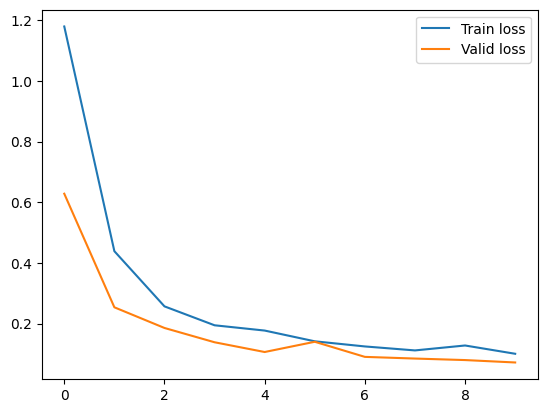

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'Valid loss')
plt.legend()
plt.show()

This code uses the Matplotlib library to create a line plot. It plots two lines on the same graph:

1. The first line is the training loss, and it uses data from the 'loss' key in the 'history' dictionary.
2. The second line is the validation loss, and it uses data from the 'val_loss' key in the 'history' dictionary.

The `plt.legend()` function adds a legend to the plot to distinguish between the two lines, and `plt.show()` displays the plot. This code is typically used to visualize the training and validation loss of a machine learning model during training to assess its performance.

In [37]:
# Evaluate the model on the test data
loss, acc = model.evaluate(X_test, test_y_enc, verbose=0)
print("Test loss:", loss)
print("Test accuracy:", acc)


Test loss: 0.24679780006408691
Test accuracy: 0.9089999794960022


This code evaluates a machine learning model on a test dataset. It calculates two metrics:

1. **Loss**: A measure of how well the model's predictions match the actual values in the test data. Lower values indicate better performance.

2. **Accuracy**: A measure of how many predictions the model got correct compared to the total number of predictions in the test data. It's usually expressed as a percentage.

The code prints out the calculated loss and accuracy for the model's performance on the test data.

In [38]:
model.save('lstm_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


This code is saving a machine learning model to a file named 'lstm_model.h5'. The model can later be loaded and used for making predictions without the need to retrain it from scratch.

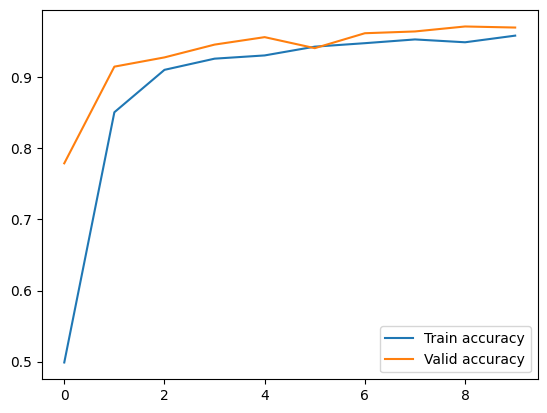

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'Valid accuracy')
plt.legend()
plt.show()

This code uses the Matplotlib library to create a line plot. It plots the training accuracy and validation accuracy values stored in the `history` object. The training accuracy is represented as a blue line, labeled "Train accuracy," and the validation accuracy is represented as an orange line, labeled "Valid accuracy." The `plt.legend()` adds a legend to the plot to distinguish between the two lines, and `plt.show()` displays the plot.

In [40]:
# Generate predictions on the test data
test_predictions = model.predict(X_test)
predicted_labels = np.argmax(test_predictions, axis=1)

63/63 [==============================] - 2s 10ms/step


This code snippet generates predictions using a machine learning model on a test dataset. It first uses the `model.predict` method to obtain predicted probabilities for each class for the test data `X_test`. Then, it finds the class label with the highest probability for each data point by using `np.argmax` along `axis=1`. The resulting `predicted_labels` variable contains the predicted class labels for the test data.

In [41]:
# Decode integer-encoded labels back to original emotions
predicted_emotions = label_encoder.inverse_transform(predicted_labels)
true_emotions = test_y

1. `predicted_labels` are integer-encoded labels predicted by a machine learning model.
2. `label_encoder` is an object that was used to encode emotions into integers (e.g., "happy" as 0, "sad" as 1).
3. `label_encoder.inverse_transform(predicted_labels)` reverses the encoding process, converting the integer predictions back into their original emotion labels, and stores them in the `predicted_emotions` variable.
4. `test_y` presumably contains the true emotions corresponding to the test data, which were never encoded.
5. `true_emotions` stores these true emotion labels.

In summary, this code takes predicted integer-encoded labels, decodes them to their original emotions using the `label_encoder`, and stores both the predicted and true emotions for comparison or evaluation purposes.

In [42]:
confusion_mtx = confusion_matrix(true_emotions, predicted_emotions)

This code computes a confusion matrix to evaluate the performance of a machine learning model's predictions. It takes two input arrays, `true_emotions` containing the true (actual) emotion labels, and `predicted_emotions` containing the predicted emotion labels generated by the model. The resulting `confusion_mtx` is a matrix that shows how many times each pair of true and predicted emotions occurs, which helps in assessing the model's accuracy and error patterns.

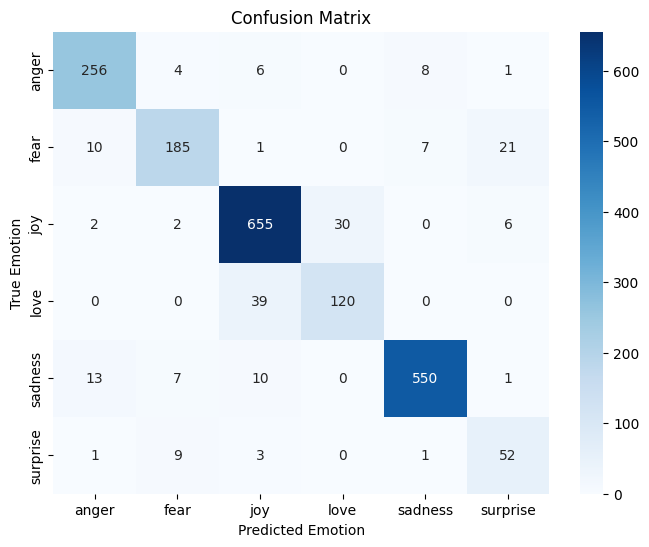

In [43]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Emotion")
plt.ylabel("True Emotion")
plt.title("Confusion Matrix")
plt.show()

This code is used to visualize a confusion matrix for a machine learning model's predictions. It uses Python libraries like Matplotlib and Seaborn to create a heatmap. The confusion matrix is a table that helps evaluate the performance of a classification model by showing the count of correct and incorrect predictions for different classes. In this code:

1. A figure with a specified size is created for the plot.
2. The confusion matrix (presumably stored in the variable `confusion_mtx`) is displayed as a heatmap using Seaborn's `heatmap` function.
3. The `annot=True` parameter adds the values of the matrix cells to the heatmap.
4. `fmt="d"` specifies that the values should be displayed as integers.
5. The color map "Blues" is used to represent the intensity of the values.
6. The x-axis and y-axis labels are set using the class labels from `label_encoder.classes_`.
7. The plot is given a title, and it's displayed using `plt.show()`.

This code helps you visualize how well your machine learning model is performing in terms of predicting different classes by highlighting correct and incorrect predictions in the form of a color-coded heatmap.

In [44]:
# Generate a classification report
report = classification_report(true_emotions, predicted_emotions)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

       anger       0.91      0.93      0.92       275
        fear       0.89      0.83      0.86       224
         joy       0.92      0.94      0.93       695
        love       0.80      0.75      0.78       159
     sadness       0.97      0.95      0.96       581
    surprise       0.64      0.79      0.71        66

    accuracy                           0.91      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.91      0.91      0.91      2000



In [45]:
import numpy as np

# Function to predict emotions for a list of text inputs
def predict_emotions(text_inputs, model, vectorize_layer, label_encoder):
    # Vectorize the text inputs using the same TextVectorization layer used during training
    text_inputs_vec = vectorize_layer(text_inputs)

    # Make predictions using the trained model
    predictions = model.predict(text_inputs_vec)

    # Convert predicted probabilities to emotion labels using the label encoder
    predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

    return predicted_labels

# Example usage:
new_texts = [
    "I feel bored while watching the movie and my friend call me for dineer.",
    "The news about the accident was devastating and made me feel sad.",
    "The conflict with a close friend has left me feeling hurt and upset.",
    "I received a surprise gift from my partner, and it made me so happy.",
    "I feel anxious about the upcoming exam.",
    "I'm thrilled and excited about the upcoming vacation.",
    "I feel frustrated and annoyed with the constant noise outside.",
    "The scary movie gave me chills and made me fearful.",
    "I got your gift and I am glad now."]

predicted_emotions = predict_emotions(new_texts, model, vectorize_layer, label_encoder)

# Print the predicted emotions
for text, emotion in zip(new_texts, predicted_emotions):
    print(f"Text: {text} \n Predicted Emotion: {emotion}\n")


1/1 [==============================] - 0s 23ms/step
Text: I feel bored while watching the movie and my friend call me for dineer. 
 Predicted Emotion: sadness

Text: The news about the accident was devastating and made me feel sad. 
 Predicted Emotion: sadness

Text: The conflict with a close friend has left me feeling hurt and upset. 
 Predicted Emotion: sadness

Text: I received a surprise gift from my partner, and it made me so happy. 
 Predicted Emotion: joy

Text: I feel anxious about the upcoming exam. 
 Predicted Emotion: fear

Text: I'm thrilled and excited about the upcoming vacation. 
 Predicted Emotion: joy

Text: I feel frustrated and annoyed with the constant noise outside. 
 Predicted Emotion: anger

Text: The scary movie gave me chills and made me fearful. 
 Predicted Emotion: fear

Text: I got your gift and I am glad now. 
 Predicted Emotion: joy



This code defines a Python function called `predict_emotions` that takes a list of text inputs, a machine learning model, a text vectorization layer, and a label encoder as input. The function's purpose is to predict emotions associated with each text input.

1. The code first imports the necessary library, NumPy.

2. The `predict_emotions` function takes four arguments:
   - `text_inputs`: A list of text inputs for which emotions need to be predicted.
   - `model`: A trained machine learning model capable of predicting emotions from text.
   - `vectorize_layer`: A TextVectorization layer used for preprocessing the text inputs, ensuring they are in a suitable format for the model.
   - `label_encoder`: An encoder used to convert predicted probabilities into emotion labels.

3. Inside the function:
   - It vectorizes the input texts using the provided `vectorize_layer`.
   - It uses the trained `model` to make predictions on the vectorized text inputs.
   - It converts the predicted probabilities into emotion labels using the `label_encoder`.
   - The predicted emotion labels are returned as a list.

4. The code provides an example usage of the `predict_emotions` function:
   - It defines a list of new text inputs (`new_texts`).
   - It calls the `predict_emotions` function with the provided arguments to predict emotions for the new texts.

5. Finally, it prints the predicted emotions for each input text, pairing the text input with its corresponding predicted emotion.

In summary, this code defines a function for predicting emotions from text using a trained machine learning model and demonstrates how to use it with a list of example text inputs.